# Weight Details Editor

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish SQL connection.
sql_connection = sqlite3.connect('diet.sqlite')
# Import desired table and set the index to id.
current_details = pd.read_sql('SELECT * FROM weight_details_2023', sql_connection, index_col='index')
current_details.tail(10)

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
24,1000025,2023-05-19 15:18:42,193.6,25.4,78.7,49.2,LEGS
25,1000026,2023-05-20 15:21:21,192.0,25.1,78.4,48.2,REST
26,1000027,2023-05-21 16:09:44,193.2,25.9,77.8,50.0,BACK
27,1000028,2023-05-23 15:49:10,189.8,24.5,78.1,46.5,REST
28,1000029,2023-05-24 14:57:23,190.2,23.1,80.1,43.9,REST
29,1000030,2023-05-25 16:00:57,189.6,25.2,77.2,47.7,REST
30,1000031,2023-05-26 20:49:52,194.2,25.4,78.9,49.4,REST
31,1000032,2023-05-28 16:00:34,190.6,24.4,78.6,46.6,CHST
32,1000033,2023-05-29 15:40:37,195.4,26.0,78.7,50.7,BACK


In [3]:
current_details.shape

(34, 7)

In [4]:
current_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   entry_id            34 non-null     int64  
 1   date_time           34 non-null     object 
 2   body_weight         34 non-null     float64
 3   bodyfat_percentage  34 non-null     float64
 4   muscle_mass         34 non-null     float64
 5   fat_mass            34 non-null     float64
 6   workout_type        34 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.1+ KB


In [5]:
current_details[['body_weight', 'bodyfat_percentage', 'muscle_mass', 'fat_mass']].describe()

,body_weight,bodyfat_percentage,muscle_mass,fat_mass
count,34.000000,34.000000,34.000000,34.000000
mean,193.952941,25.273529,78.982353,49.061765
std,2.370045,0.935595,1.050100,2.296244
min,189.600000,23.100000,76.600000,43.900000
25%,192.600000,24.850000,78.400000,47.825000
50%,193.800000,25.250000,78.800000,49.300000
75%,196.000000,25.850000,80.000000,50.000000
max,198.200000,27.600000,80.700000,54.300000


## Create New Entry

In [6]:
# Create a new entry.
e_id = current_details.iloc[-1, 0] + 1
weight_entry = float(input("Enter Weight: "))
bf_entry = float(input("Enter Body Fat Percentage: "))
mm_entry = float(input("Enter Muscle Mass: "))
fm_entry = float(input("Enter Fat Mass: "))
wt_entry = input("Enter Workout Type: ")
new_entry = [e_id, pd.to_datetime("today").round(freq="S"), weight_entry, bf_entry, mm_entry, fm_entry, wt_entry]
current_details.loc[len(current_details)] = new_entry
current_details['date_time'] = pd.to_datetime(current_details['date_time'])
new_details = current_details
new_details.tail()

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
30,1000031,2023-05-26 20:49:52,194.2,25.4,78.9,49.4,REST
31,1000032,2023-05-28 16:00:34,190.6,24.4,78.6,46.6,CHST
32,1000033,2023-05-29 15:40:37,195.4,26.0,78.7,50.7,BACK
33,1000034,2023-05-30 15:41:25,196.6,25.0,80.5,49.2,REST
34,1000035,2023-06-01 15:04:26,195.2,25.2,79.6,49.2,REST


## Data Manipulation

In [ ]:
# Update data at position.
# current_details.loc[1, 'date_time'] = '2023-05-13 21:49:00'
# Drop operations
# current_details.drop(index=current_details.index[-1], axis=0, inplace=True) # Remove last row
new_details.tail()

## Update SQL

In [7]:
# Export updated table to sql with time stamp.
new_details.to_sql('weight_details_2023', sql_connection, if_exists='replace')

# TODO: MANUALLY REVIEW AND EXPORT NEW TABLE TO CSV AS BACKUP!!

35

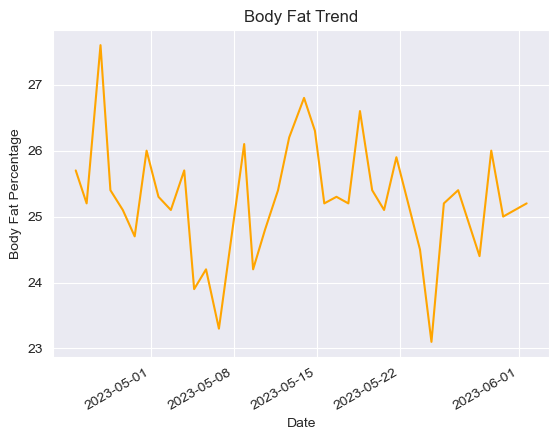

In [8]:
# Plot the data
new_details.plot(
    kind='line',
    title="Body Fat Trend",
    x='date_time',
    xlabel="Date",
    y='bodyfat_percentage',
    ylabel="Body Fat Percentage",
    legend=False,
    color='orange'
)

plt.show()

<Axes: title={'center': 'Body Fat Percentage'}, xlabel='bodyfat_percentage'>

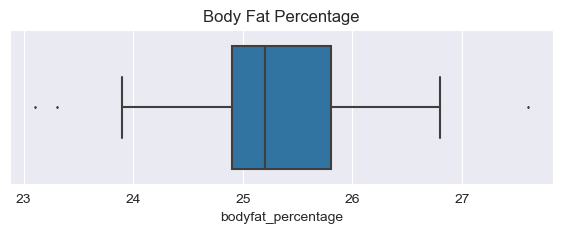

In [9]:
plt.figure(figsize=(7,2))
plt.title("Body Fat Percentage")
sns.boxplot(data=None, x=new_details['bodyfat_percentage'], fliersize=1)

Text(0.5, 1.0, 'Body Weight Histogram')

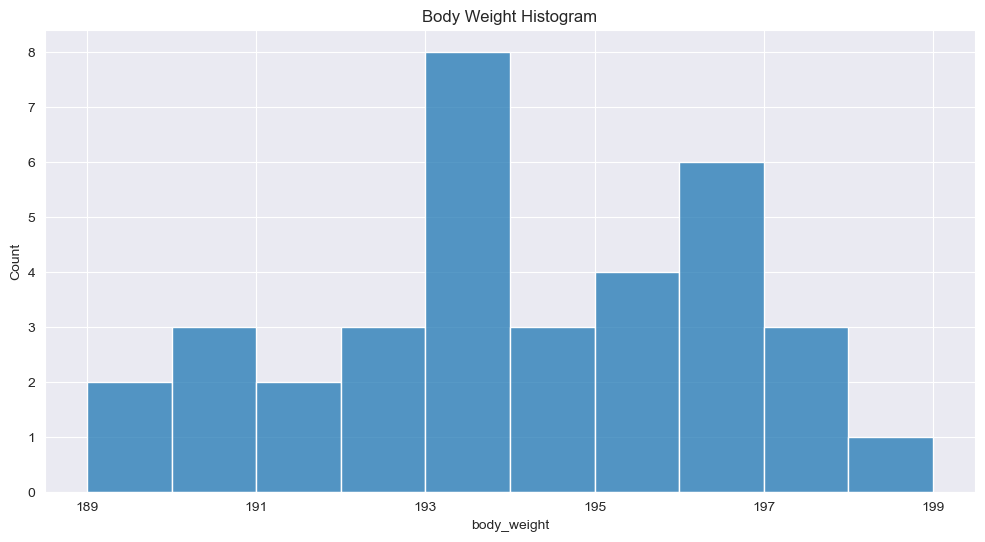

In [13]:
plt.figure(figsize=(12,6))
ax = sns.histplot(new_details['body_weight'], bins=range(189,200,1))
ax.set_xticks(range(189,200,2))
ax.set_xticklabels(range(189,200,2))
plt.title('Body Weight Histogram')

<Axes: title={'center': 'Body Weight'}, xlabel='body_weight'>

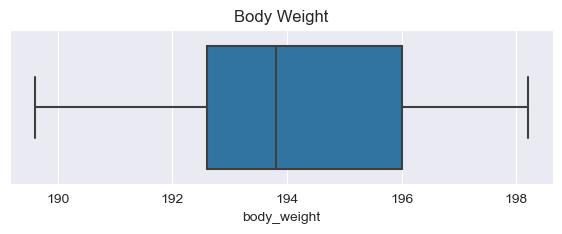

In [14]:
plt.figure(figsize=(7,2))
plt.title("Body Weight")
sns.boxplot(data=None, x=new_details['body_weight'], fliersize=1)

<h2> LOG: </h2>
<ul>
  <li> 2023-05-15: Wine removed from the diet will determine effectiveness 14 days from the log date.
  <br> - NO EFFECTIVE CHANGE IN BODYFAT %</li>
  <br>
  <li> 2023-05-29: Reduce the range of the calorie cycle to determine effectiveness 30 days from the log date. </li>
</ul>
